In [1]:
!ifconfig

eth0: flags=4163<UP,BROADCAST,RUNNING,MULTICAST>  mtu 1500
        inet 172.18.0.5  netmask 255.255.0.0  broadcast 172.18.255.255
        ether 02:42:ac:12:00:05  txqueuelen 0  (Ethernet)
        RX packets 765  bytes 181541 (181.5 KB)
        RX errors 0  dropped 0  overruns 0  frame 0
        TX packets 762  bytes 4088692 (4.0 MB)
        TX errors 0  dropped 0 overruns 0  carrier 0  collisions 0

lo: flags=73<UP,LOOPBACK,RUNNING>  mtu 65536
        inet 127.0.0.1  netmask 255.0.0.0
        inet6 ::1  prefixlen 128  scopeid 0x10<host>
        loop  txqueuelen 1000  (Local Loopback)
        RX packets 545  bytes 110020 (110.0 KB)
        RX errors 0  dropped 0  overruns 0  frame 0
        TX packets 545  bytes 110020 (110.0 KB)
        TX errors 0  dropped 0 overruns 0  carrier 0  collisions 0



In [ ]:
# !ping MONGODB

In [1]:
!ping 172.18.0.3

PING 172.18.0.3 (172.18.0.3) 56(84) bytes of data.
64 bytes from 172.18.0.3: icmp_seq=1 ttl=64 time=0.152 ms
64 bytes from 172.18.0.3: icmp_seq=2 ttl=64 time=0.092 ms
64 bytes from 172.18.0.3: icmp_seq=3 ttl=64 time=0.089 ms
64 bytes from 172.18.0.3: icmp_seq=4 ttl=64 time=0.140 ms
64 bytes from 172.18.0.3: icmp_seq=5 ttl=64 time=0.058 ms
64 bytes from 172.18.0.3: icmp_seq=6 ttl=64 time=0.077 ms
64 bytes from 172.18.0.3: icmp_seq=7 ttl=64 time=0.093 ms
64 bytes from 172.18.0.3: icmp_seq=8 ttl=64 time=0.109 ms
64 bytes from 172.18.0.3: icmp_seq=9 ttl=64 time=0.053 ms
64 bytes from 172.18.0.3: icmp_seq=10 ttl=64 time=0.072 ms
64 bytes from 172.18.0.3: icmp_seq=11 ttl=64 time=0.054 ms
64 bytes from 172.18.0.3: icmp_seq=12 ttl=64 time=0.103 ms
64 bytes from 172.18.0.3: icmp_seq=13 ttl=64 time=0.129 ms
64 bytes from 172.18.0.3: icmp_seq=14 ttl=64 time=0.103 ms
^C

--- 172.18.0.3 ping statistics ---
14 packets transmitted, 14 received, 0% packet loss, time 12987ms
rtt min/avg/max/mdev = 0.05

In [1]:
!ping 172.18.0.4

PING 172.18.0.4 (172.18.0.4) 56(84) bytes of data.
64 bytes from 172.18.0.4: icmp_seq=1 ttl=64 time=0.104 ms
64 bytes from 172.18.0.4: icmp_seq=2 ttl=64 time=0.077 ms
64 bytes from 172.18.0.4: icmp_seq=3 ttl=64 time=0.170 ms
64 bytes from 172.18.0.4: icmp_seq=4 ttl=64 time=0.075 ms
64 bytes from 172.18.0.4: icmp_seq=5 ttl=64 time=0.049 ms
64 bytes from 172.18.0.4: icmp_seq=6 ttl=64 time=0.051 ms
64 bytes from 172.18.0.4: icmp_seq=7 ttl=64 time=0.052 ms
64 bytes from 172.18.0.4: icmp_seq=8 ttl=64 time=0.054 ms
64 bytes from 172.18.0.4: icmp_seq=9 ttl=64 time=0.054 ms
64 bytes from 172.18.0.4: icmp_seq=10 ttl=64 time=0.053 ms
^C

--- 172.18.0.4 ping statistics ---
10 packets transmitted, 10 received, 0% packet loss, time 8991ms
rtt min/avg/max/mdev = 0.049/0.073/0.170/0.036 ms


In [2]:
!which ping

/usr/bin/ping


In [3]:
!pip install mysql-connector-python

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 23.1 MB/s eta 0:00:0000:0100:01


In [5]:
import mysql.connector

try:
    conn = mysql.connector.connect(
        host="mysql", # MYSQL 서버주소
        user="root",
        password="1234"
    )
    if conn.is_connected():
        print("MYSQL 서버에 성공적으로 연결되었습니다.")
except mysql.connector.Error as err:
    print("MYSQL 연결 실패:")
finally:
    if conn.is_connected():
        print("연결중...")

MYSQL 서버에 성공적으로 연결되었습니다.
연결중...


In [6]:
# 커서 생성
cursor = conn.cursor()
que = "CREATE DATABASE IF NOT EXISTS judb"
cursor.execute(que)
conn.close()

In [7]:
# MySQL에 연결
conn = mysql.connector.connect(
    host="mysql", # MYSQL 서버주소
    user="root",
    password="1234",
    database="judb" # 사용할 데이터 베이스
)
cursor = conn.cursor()
print("MySQL 연결 성공!")

MySQL 연결 성공!


In [8]:
# 테이블 생성
query = "CREATE TABLE IF NOT EXISTS users(id INT AUTO_INCREMENT PRIMARY KEY, name VARCHAR(100), age INT, city VARCHAR(50))"
cursor.execute(query)
print("테이블 생성완료")

테이블 생성완료


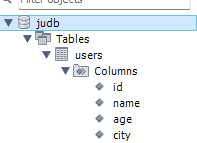

In [21]:
# 단일 데이터 삽입
sql = "INSERT INTO users (name, age, city) VALUES (%s, %s, %s)"
values = ("Alice", 25, "Seoul")
cursor.execute(sql, values)
conn.commit()
print("1개의 데이터 삽입 완료, ID:", cursor.lastrowid)

1개의 데이터 삽입 완료, ID: 4


In [18]:
# 잘못만든 데이터 하나 삭제
sql = "DELETE FROM users WHERE id = %s"
value = (2,3)
cursor.execute(sql, value)
conn.commit()
print("ID 2,3번 데이터 삭제 완료")

ProgrammingError: Not enough parameters for the SQL statement

In [22]:
# 여러개의 데이터 삽입
m_values = [("superman", 33, "Busan"), ("Cutegirl", 17, "Incheon"), ("Coolboy", 22, "Jeju")]
cursor.executemany(sql, m_values)
conn.commit()
print("여러 개의 데이터 삽입 완료 !")

여러 개의 데이터 삽입 완료 !


In [23]:
# 모든 데이터 조회
que = "SELECT * FROM users"
cursor.execute(que)
users = cursor.fetchall()
# print(users)
for user in users:
    print(user)

(1, 'Alice', 25, 'seoul')
(3, 'Alice', 25, 'Seoul')
(4, 'Alice', 25, 'Seoul')
(5, 'superman', 33, 'Busan')
(6, 'Cutegirl', 17, 'Incheon')
(7, 'Coolboy', 22, 'Jeju')


In [25]:
# 특정 조건 데이터 조회(24살 이상만 조회)
que = "SELECT * FROM users"
filters = " WHERE age >= 24"
cursor.execute(que + filters)

filtered = cursor.fetchall()
for f in filtered:
    print(f)

(1, 'Alice', 25, 'seoul')
(3, 'Alice', 25, 'Seoul')
(4, 'Alice', 25, 'Seoul')
(5, 'superman', 33, 'Busan')


In [26]:
# 특정 사용자의 나이 수정
sql = "UPDATE users SET age = %s WHERE name = %s"
values = (19,"Alice")
cursor.execute(sql, values)
conn.commit()
print("수정된 행 개수:", cursor.rowcount)

수정된 행 개수: 3


In [29]:
# 특정 사용자 삭제
que = "DELETE FROM users WHERE city = %s"
filters = ("jeju",)
cursor.execute(que, filters)
conn.commit()
print(f"{filters}에 해당하는 목록을 삭제하였습니다.")

('jeju',)에 해당하는 목록을 삭제하였습니다.
